In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

In [2]:
env_path = 'velocity/Wave'

In [3]:
env = wave.WaveEnv(env_path)

WAVE environment created.


In [4]:
hidden_layer = 1024
model = ppo_model.PPO(64, 2, hidden_layer, lr=1e-4)
save_path = './results/velocity/ppo'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


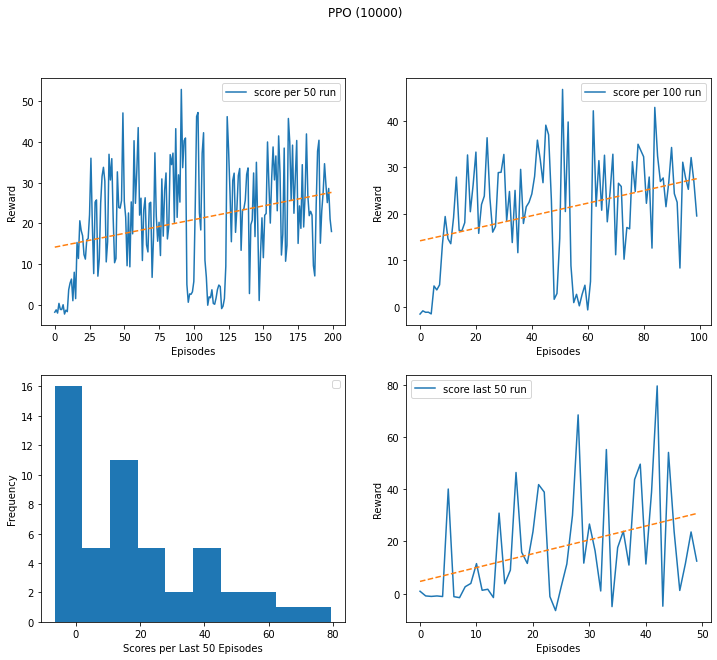

EPOCH: 9999, total reward: 12.434165773913264, timestep: 190


In [5]:
model.set_train_params(max_step=1000, plot_smooth=50)
model.train(env, 10000, show_plot=True)

In [6]:
model.save_model()

Model saved
Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

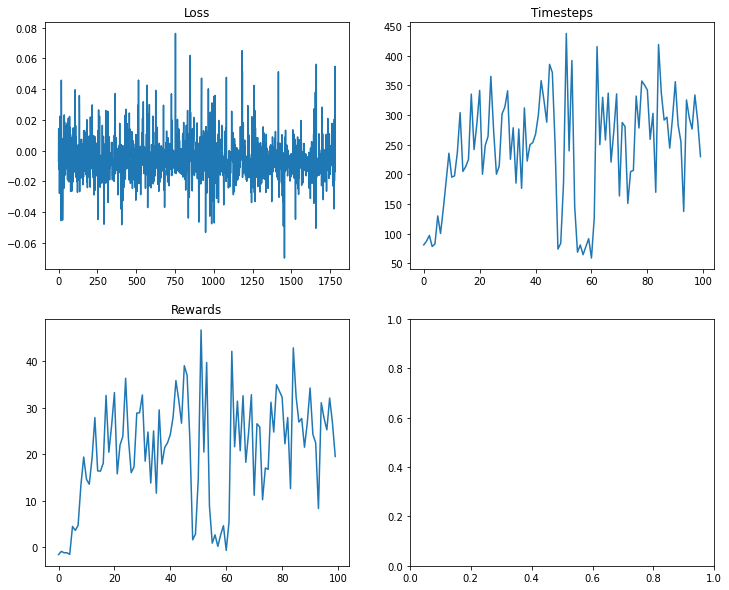

In [7]:
model.plot_train_memory(smooth=100)

In [6]:
env = wave.WaveEnv(env_path, 20)
model.test(env)

WAVE environment created.


(985.8043099213392, 8106)

In [5]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

WAVE environment created.
TRY 1: 27.578163803787902, 295
WAVE environment created.
TRY 2: 113.29353512567468, 1048
WAVE environment created.
TRY 3: -7.392701272619888, 40
WAVE environment created.
TRY 4: 27.578162788646296, 295
WAVE environment created.
TRY 5: 143.58335070242174, 1131
WAVE environment created.
TRY 6: 117.58527275850065, 1047
WAVE environment created.
TRY 7: 164.5931766491849, 1382
WAVE environment created.
TRY 8: 44.004736255155876, 460
WAVE environment created.
TRY 9: 62.128610032843426, 565
WAVE environment created.
TRY 10: 109.57957596075721, 925


(80.25318828043528, 718.8)

In [6]:
env.close()